In [1]:
# import packages for data manipulation
import numpy as np
import pandas as pd
import os
from glob import glob
import tensorflow as tf
import cv2

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# def get_dir_list(base_path, include_files=False, include_relative_path=True, print_paths=True):
#     '''
#     Input: 
#         base_path (string) path to parent folder to get containing items
#         *kwargs
#         include_files (bool=False) set to True to include file paths within directory
#         include_relative_path (bool=True) set to False to return file/folder names instead of relative paths
#     Returns:
#         clean_directory (list of os paths/ strings) items within directory, depending on specified *kwargs either relative path or file/folder names
#     '''
#     if include_relative_path == True:
#         clean_directory = glob(os.path.join(base_path, '*'))
        
#     else:
#         clean_directory = os.listdir(base_path)

#     if not include_files:
#         # iterate through directory
#         for name in clean_directory:

#             # remove all names with file extensions
#             if print_paths:
#                 print('path: ', name)

#             filename = name.split('/')[-1]

#             if '.' in filename:
#                 print(f'removed {name} from list')
#                 clean_directory.remove(name)
            
#     return clean_directory

In [4]:
# def get_img_paths(base_dir, folders_split=True):
#     '''
#     This function takes an input of a folder path and returns a list of tuples containing image paths with identifiers of 0 for Pneumonia and 1 for Normal.
#     The path specified must contain folders named NORMAL and PNEUMONIA, or parent folders containing folders named NORMAL and PNEUMONIA
    
#     Inputs:
#         base_dir (string/ os.path type) relative path to the directory with folders containing images
#         *kwargs
#         folders_split (bool=True) when set to true will assume images are split between train, test, and/or validation folders
        
#     Returns:
#         img_paths (list of tuples) each tuple in this list has the file path to an image at position [0] and binary identifier at position [1]
#     '''
#     # instantiate empty lists to populate with paths
#     pneumonia_paths = []
#     normal_paths = []
    
#     # if data is split into train/test/val folders, find files recursively
#     if folders_split:
#         folder_paths = get_dir_list(base_dir, include_relative_path=True, print_paths=False);
# #         print('folder paths: ', folder_paths)
        
#         # iterate through each folder
#         for i in range(len(folder_paths)):
#             print(' *** some FOLDER:  ***', folder_paths[i])
            
#             normal_or_pneumonia_folder = get_dir_list(folder_paths[i], include_relative_path=True, include_files=False, print_paths=False);
            
#             print(f'IS THIS BINARY??? {normal_or_pneumonia_folder}')
        
#             for k in range(len(normal_or_pneumonia_folder)):
# #                 print(f'current folder path: {current_folder_paths[k]}')
# #                 print(f'k = {k}')
#                 current_folder_img_paths = get_dir_list(normal_or_pneumonia_folder[k], include_relative_path=True, include_files=True, print_paths=False);
# #                 print(current_folder_img_paths)
        
#                 if k == 1:
# #                     print(f'PneumoniaPath: {current_folder_img_paths}')
#                     pneumonia_paths.extend(current_folder_img_paths)
                
#                 if k == 0:
# #                 print(f'NormalPath: {current_folder_img_paths}')
#                     normal_paths.extend(current_folder_img_paths) 
    
    
#     pneumonia = []
#     for i in range(len(pneumonia_paths)):
# #         print('PPPP\n\n path',pneumonia_paths[i])
#         pneumonia.append((pneumonia_paths[i], 0))
    
#     normal = []
#     for i in range(len(normal_paths)):
# #         print('NNNN\n\n path',normal_paths[0][i])
#         normal.append((normal_paths[i], 1))
    
#     return pneumonia, normal

In [58]:
# def get_img_paths(base_dir, folders_split=True, single_return=True):
#     '''
#     This function takes an input of a folder path and returns a list of tuples containing image paths with identifiers of 0 for Pneumonia and 1 for Normal.
#     The path specified must contain folders named NORMAL and PNEUMONIA, or parent folders containing folders named NORMAL and PNEUMONIA
    
#     Inputs:
#         base_dir (string/ os.path type) relative path to the directory with folders containing images
#         *kwargs
#         folders_split (bool=True) when set to true will assume images are split between train, test, and/or validation folders
        
#     Returns:
#         img_paths (list of tuples) each tuple in this list has the file path to an image at position [0] and binary identifier at position [1]
#     '''
#     #instantiate empty lists to populate with paths
#     pneumonia_paths = []
#     normal_paths = []
    
#     # this is a grandparent folder, find paths to parent folders
    

#     folder_paths = get_dir_list(base_dir, include_relative_path=True, print_paths=False)
#     print('folder paths: ', folder_paths)
    
#     # loop through grandparent folders
#     for i in range(len(folder_paths)):
#         # get grandparent folders
#         grandparent_folder = folder_paths[i]
        
#         # get lung_type folders
#         lung_folders = get_dir_list(grandparent_folder, include_relative_path=True, print_paths=False)
        
#         # loop through lung folder types and get paths
        
#         for j in range(len(lung_folders)):
#             print(lung_folders[j], j)
#             #get image paths
#             image_paths = get_dir_list(lung_folders[j], include_relative_path=True, include_files=True)
            
#             # loop through paths and add identifiers 
#             for path in image_paths:
                
#                 # get normal images at index [0]
#                 if j == 0:
#                     normal_paths.append((path, 0))
                    
#                 # get pneumonia images at index [1]
#                 if j == 1:
#                     pneumonia_paths.append((path, 1))
        
#         # combine into single list if necessary
#         if single_return:
#             print('Len Normal Path:', len(normal_paths))
#             print('Len Pneumonia Paths', len(pneumonia_paths))
#             normal_paths.extend(pneumonia_paths)
            
#             return normal_paths
            
#         else:
#             return normal_paths, pneumonia_paths
        

    
# #     return pneumonia_paths, normal_paths


In [107]:
def get_img_paths(base_dir, ignore_filetypes=['.txt'], type_folders={'NORMAL':0, 'PNEUMONIA':1}):
    '''
    Inputs:
        base_dir (string/ os.path type) relative path to the directory with folders containing images
        *kwargs
        ignore_filetypes (list of strings) filetypes to exclude from output
        type_foldes (dictionary) folders that identify different filetypes and add identifiers to add to output
    Returns:
        paths (list of tuples) relative paths to files with identifiers
    '''
    normal_paths = []
    pneumonia_paths = []
        
    for root, dirs, files in os.walk(base_dir):
        #remove undesired files
        if ignore_filetypes:
        #check each file
            for file in files:                
                for file_type in ignore_filetypes:
                    if file_type in file:
                        files.remove(file)
        if files:
            for file in files:
                    full_path = os.path.join(root, file)
                    
                    if 'NORMAL' in full_path:
                        normal_paths.append((full_path, 0))
                        
                    elif 'PNEUMONIA' in full_path:
                        pneumonia_paths.append((full_path, 1))
                    
        
        
        
                
#         if type_folders:
#             for key, value in type_folders.items():
#                 if key in root:
                    
#         print('root: ', root)
#         print('files: ', files[:5], len(files))
#         print('paths: ', paths)
    normal_paths.extend(pneumonia_paths)
    return normal_paths

In [108]:
base_dir = '../../data/chest_xray'
x = get_img_paths(base_dir)
len(x)

5856

In [126]:
x[-4]

('../../data/chest_xray\\val\\PNEUMONIA\\person1950_bacteria_4881.jpeg', 1)

In [47]:
# len(pneumonia_paths)

In [128]:
base_dir = '../../data/chest_xray'
paths = get_img_paths(base_dir)

x_train, x_val, x_test, y_train, y_val, y_test = custom_tts(paths, train_val_test_percents=(0.8, 0.025, 0.175))

In [247]:
def split_bac_viral(pneumonia_paths, normal_paths, normal_first=True):
    '''
    This function takes data and splits into bacterial and viral data
    Input:
        pnuemonia_paths (list of tuples) each tuple is a file path in index [0] and classification representing pneumonia in index [1]
        normal_paths (list of tuples) each tuple is a file path in index [0] and classification representing normal lungs in index [1]
        *kwargs
            normal_first (bool=True) bool specifying if normal data should be first index [0] or last 
    Returns:
        normal_paths (list of tuples) each tuple is a file path in index [0] and classification representing normal lungs in index [1]
        bac_paths (list of tuples) each tuple is a file path in index [0] and classification representing lungs with viral pneumonia in index [1]
        vir_paths (list of tuples) each tuple is a file path in index [0] and classification representing lungs with viral pnuemonia in index [1]
    '''
    
    # instantiate lists to hld different paths
    
    bac_paths = []
    vir_paths = []
    
    # iterate through paths and sort by name     
    for path in pneumonia_paths:
        
        if 'bac' in path[0]:
            bac_paths.append(path)
            
        elif 'vir' in path[0]:
            vir_paths.append(path)
            
        else:
            print(f'***PATH UNABLE TO BE IDENTIFIED: {path}')
            
            
        
    # change "normal" identifier to 0 or 2
    # return according to index
    
    if normal_first:
        for i in range(len(normal_paths)):
            normal_paths[i][1] = 0
        return normal_paths, bac_paths, vir_paths
    else:
        for i in range(len(normal_paths)):
            normal_paths[i][1] = 2
        return bac_paths, vir_paths, normal_paths
    

In [53]:
def custom_tts(data, train_val_test_percents=(0.8, 0.025, 0.175), random_state=2021):
    '''
    This function takes a tuple of data and returns a tuple of train, test, and validation data
    Input:
        data (list/ array like) each entry contians a file path in position [0] and classification in position [1]
        train_val_test_percents (triple) triple containing decimal representations of split percentages used in train test split
        *kwargs

    Returns:
        x_train
        x_val
        x_test
        
    '''
    # Extract percentages used in split from triple
    train_pct = train_val_test_percents[0]
    test_pct = 1 - train_pct
    val_pct = train_val_test_percents[0]/test_pct
    paths = [d[0] for d in data]
    types = [t[1] for t in data]
    x_train, x_test, y_train, y_test = train_test_split(paths, types, train_size=train_pct, random_state=random_state)
    
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=train_pct, random_state=random_state)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

In [117]:
def get_data(x, y, img_size=150):

    data = []
    
    for i in range(len(x)): 
        path = x[i]
        class_num = y[i]

    #         for img in os.listdir(path):

        try:
            img_arr = cv2.imread(path)
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append([resized_arr, class_num])

        except Exception as e:
            print(e)
                
    return np.array(data)

In [122]:
base_dir = '../../data/chest_xray'
paths = get_img_paths(base_dir)
len(paths)
x_train, x_val, x_test, y_train, y_val, y_test = custom_tts(paths, train_val_test_percents=(0.8, 0.025, 0.175))
train = get_data(x_train, y_train)
test = get_data(x_test, y_test)
val = get_data(x_val, y_val)

In [112]:
len(x_train)

4684

In [113]:
len(x_val)

938

In [92]:
get_dir_list(base_dir, include_relative_path=True)

path:  readme.txt
removed readme.txt from list
path:  train
path:  val


['test', 'train', 'val']

In [226]:
len(data)

16841

In [227]:
len(data[:][0])

2

In [257]:
data[:][0]

('../../data/chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg', 1)

In [256]:
data[0]

('../../data/chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg', 1)

In [258]:
x, y, z, x1, y2, z3 = custom_tts(data)

In [232]:
len(x1)

13472

In [130]:
blah = get_data(x[0])

TypeError: get_data() missing 1 required positional argument: 'y'

In [216]:
len(y)

2696

In [217]:
len(z)

673

In [204]:
base_dir = '../../data/chest_xray/train'
x, y = get_img_paths(base_dir)
len(x)

folder paths:  ['../../data/chest_xray/train\\NORMAL', '../../data/chest_xray/train\\PNEUMONIA']


1341

In [ ]:
train_test_split()

In [178]:
base_dir = '../../data/chest_xray'
# check naming convention in containing folder, folder must contain test, trian, and validation folders, named accordingly for the following line to work
test_path, train_path, val_path = get_dir_list(base_dir, include_relative_path=True)
train_img = get_dir_list(train_path, include_relative_path=True)

path:  ../../data/chest_xray\readme.txt
removed ../../data/chest_xray\readme.txt from list
path:  ../../data/chest_xray\train
path:  ../../data/chest_xray\val
path:  ../../data/chest_xray\train\NORMAL
path:  ../../data/chest_xray\train\PNEUMONIA


In [83]:
os.listdir(base_dir)

['readme.txt', 'test', 'train', 'val']

In [38]:
normal_train_img = get_dir_list(train_img[0], include_files=True)
for i in range(len(normal_train_img)):
    normal_train_img[i] = (normal_train_img[i], 1)
normal_train_img[-5:-1]

[('../../data/chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg', 1),
 ('../../data/chest_xray\\train\\NORMAL\\IM-0117-0001.jpeg', 1),
 ('../../data/chest_xray\\train\\NORMAL\\IM-0119-0001.jpeg', 1),
 ('../../data/chest_xray\\train\\NORMAL\\IM-0122-0001.jpeg', 1),
 ('../../data/chest_xray\\train\\NORMAL\\IM-0125-0001.jpeg', 1)]

In [196]:
len(normal_train_img)

16841

In [39]:
# train_img = get_dir_list(train_path, relative_path=True)
pneumonia_train_img = get_dir_list(train_img[1], include_files=True)
for i in range(len(pneumonia_train_img)):
    pneumonia_train_img[i] = (pneumonia_train_img[i], 0)
pneumonia_train_img[:5]

[('../../data/chest_xray\\train\\PNEUMONIA\\person1000_bacteria_2931.jpeg', 0),
 ('../../data/chest_xray\\train\\PNEUMONIA\\person1000_virus_1681.jpeg', 0),
 ('../../data/chest_xray\\train\\PNEUMONIA\\person1001_bacteria_2932.jpeg', 0),
 ('../../data/chest_xray\\train\\PNEUMONIA\\person1002_bacteria_2933.jpeg', 0),
 ('../../data/chest_xray\\train\\PNEUMONIA\\person1003_bacteria_2934.jpeg', 0)]

In [71]:
data = normal_train_img
data.extend(pneumonia_train_img)
data[:5]

[('../../data/chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg', 1),
 ('../../data/chest_xray\\train\\NORMAL\\IM-0117-0001.jpeg', 1),
 ('../../data/chest_xray\\train\\NORMAL\\IM-0119-0001.jpeg', 1),
 ('../../data/chest_xray\\train\\NORMAL\\IM-0122-0001.jpeg', 1),
 ('../../data/chest_xray\\train\\NORMAL\\IM-0125-0001.jpeg', 1)]

In [72]:
type(data[-5:-1])

list

In [66]:
data_train, data_test = train_test_split(data, train_size=0.8, random_state=2021)

In [77]:
data_train[0]

array(['../../data/chest_xray\\train\\PNEUMONIA\\person515_bacteria_2185.jpeg',
       '0'], dtype='<U67')

In [246]:
get_data(x[:5], x1[:5])

array([[array([[[  0,   0,   0],
        [  0,   0,   0],
        [179, 179, 179],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [167, 167, 167],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [162, 162, 162],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 15,  15,  15],
        ...,
        [ 16,  16,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 15,  15,  15],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 17,  17,  17],
        [  0,   0,   0],
        [  0,   

In [242]:
x[100]

'../../data/chest_xray\\train\\PNEUMONIA\\person1609_bacteria_4237.jpeg'

In [68]:
# def get_data(data_dir, img_size=150):
    
#     data = [] 
    
#     for entry in data_dir: 
#         path = entry[0]
#         class_num = entry[1]
        
# #         for img in os.listdir(path):
            
#         try:
#             img_arr = cv2.imread(path)
#             resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
#             data.append([resized_arr, class_num])
                
#         except Exception as e:
#             print(e)
                
#     return np.array(data)

In [73]:
train_imges = get_data(data_train)

In [56]:
import matplotlib.pyplot as plt

In [59]:
train_imges[0][0]

array([[[  6,   6,   6],
        [ 11,  11,  11],
        [ 14,  14,  14],
        ...,
        [ 64,  64,  64],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       [[  3,   3,   3],
        [  9,   9,   9],
        [ 13,  13,  13],
        ...,
        [ 63,  63,  63],
        [ 55,  55,  55],
        [ 58,  58,  58]],

       [[  3,   3,   3],
        [  9,   9,   9],
        [ 11,  11,  11],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 58,  58,  58]],

       ...,

       [[ 15,  15,  15],
        [ 32,  32,  32],
        [ 54,  54,  54],
        ...,
        [ 98,  98,  98],
        [103, 103, 103],
        [ 59,  59,  59]],

       [[ 16,  16,  16],
        [ 33,  33,  33],
        [ 50,  50,  50],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 57,  57,  57]],

       [[ 14,  14,  14],
        [ 36,  36,  36],
        [ 50,  50,  50],
        ...,
        [106, 106, 106],
        [ 94,  94,  94],
        [ 54,  54,  54]]

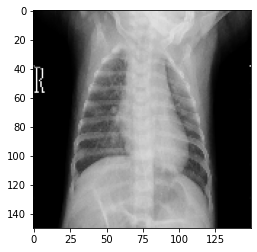

In [76]:
plt.imshow(train_imges[5][0])

In [ ]:
# def get_img_data(img_paths, img_size=150):
#     '''
#     Inputs: 
#         base_dir (string/os path) this is the base directory that contains the image folders
#         labels (list of strings) this is a list containing the names of the containing folders (can use get_dir_list() )
#     Returns:
#         data (array of arrays) image data from desired folders
#     '''
#     data = []
#     # iterate through desired folders in directory
#     for img_path in img_paths:
#         print(img_path)
#         try:
#             # use cv2 to read img data
#             img_arr = cv2.imread(os.path.abspath(img_path), cv2.IMREAD_GRAYSCALE)
#             # resize so all images match
#             resized_arr = cv2.resize(img_arr, (img_size, img_size))
#             data.append([resized_arr]) #, class_num])

#         except:
#             print('Sad_face')
                
#     return np.array(data)

In [4]:
labels = ['PNEUMONIA', 'NORMAL']

get_img_data(normal_train_img[0:1])

NameError: name 'get_img_data' is not defined